In [1]:
import os
import h5py
import time
import math
import pymp
import matplotlib
import numpy as np
import pyfftw as ft
import matplotlib.pyplot as plt

In [2]:
N = 1024

In [3]:
wiz = (b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
ft.import_wisdom(wiz)

(True, True, True)

In [4]:
fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')

In [5]:
start = time.time()

fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

0.0247249603271


In [6]:
X = np.zeros((N,N,N))
Y = np.zeros((N,N,N))
Z = np.zeros((N,N,N))

In [7]:
dx = 1./N

In [8]:
start = time.time()

for i in range(N):
    X[i,:,:] = i*dx
    
for j in range(N):
    Y[:,j,:] = j*dx
    
for k in range(N):
    Z[:,:,k] = k*dx

end = time.time()
print(end-start)

431.642416


In [9]:
os.environ['TMPDIR']='/home/idies/workspace/scratch'

In [10]:
start = time.time()

lvl = 5
threads = 8
chk = N//threads

chi = np.zeros((N,N,N),dtype='float32')

Xr = np.zeros((N,N,N))
Yr = np.zeros((N,N,N))
Zr = np.zeros((N,N,N))

digx = np.zeros((N,N,N),dtype=np.int)
digy = np.zeros((N,N,N),dtype=np.int)
digz = np.zeros((N,N,N),dtype=np.int)

end = time.time()
print(end-start)

0.00297498703003


In [ ]:
start = time.time()

chi[:,:,:] = 1

Xr[:,:,:] = X[:,:,:]
Yr[:,:,:] = Y[:,:,:]
Zr[:,:,:] = Z[:,:,:]

lvl = 5
for k in range(lvl):
    digx[:,:,:] = np.floor(3*Xr[:,:,:])
    digy[:,:,:] = np.floor(3*Yr[:,:,:])
    digz[:,:,:] = np.floor(3*Zr[:,:,:])
    
    chi[(digx==1)&(digy==1)] = 0.
    chi[(digx==1)&(digz==1)] = 0.
    chi[(digy==1)&(digz==1)] = 0.
    
    Xr[:,:,:] = (3.*Xr[:,:,:]-digx[:,:,:])
    Yr[:,:,:] = (3.*Yr[:,:,:]-digy[:,:,:])
    Zr[:,:,:] = (3.*Zr[:,:,:]-digz[:,:,:])

end = time.time()
print(end-start)

In [ ]:
start = time.time()

folder = '/home/idies/workspace/scratch'
    
nproc = 8
nx = N//nproc
lchi = np.zeros((N//nproc,N,N), dtype='float32')

for k in range(nproc):
    filename = 'menger-sponge-'+str(k)+'.npz'
    files = folder+'/'+filename
    
    lchi[:,:,:] = chi[k*nx:(k+1)*nx,:,:]
    np.savez(files,lchi=lchi)

end = time.time()
print(end-start)

In [11]:
start = time.time()

folder = '/home/idies/workspace/scratch'

nproc = 8
nx = N//nproc
chi = np.zeros((N,N,N), dtype='float32')
lchi = np.zeros((N//nproc,N,N), dtype='float32')

for k in range(nproc):
    filename = 'menger-sponge-'+str(k)+'.npz'
    files = folder+'/'+filename
    
    content = np.load(files)
    
    lchi[:,:,:] = content['lchi']
    
    chi[k*nx:(k+1)*nx,:,:] = lchi[:,:,:]

end = time.time()
print(end-start)

176.56792593


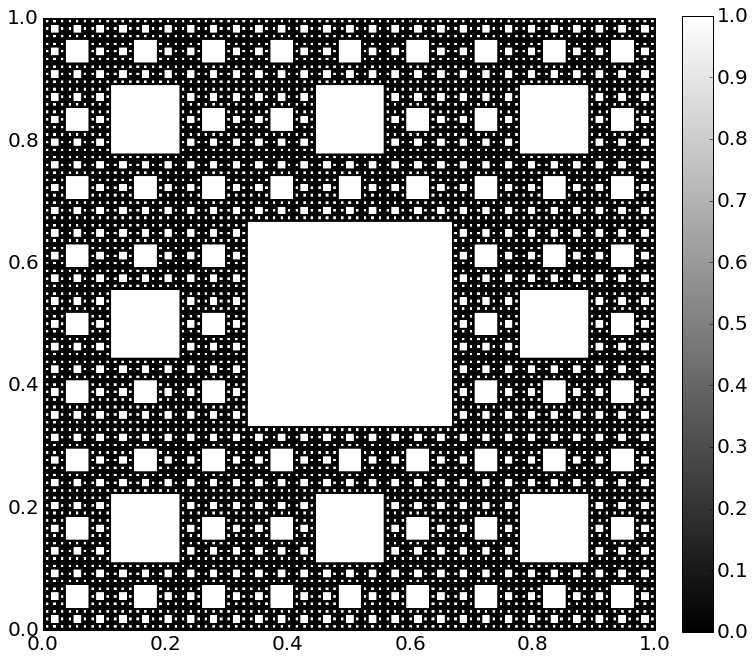

In [12]:
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig = plt.figure(figsize=(12,12))
cax = plt.imshow(1-chi[:,:,0],extent = (0,1,0,1),cmap = 'gray')
cbar = fig.colorbar(cax,fraction=0.046, pad=0.04)

plt.savefig("menger-sponge-correlation.pdf")

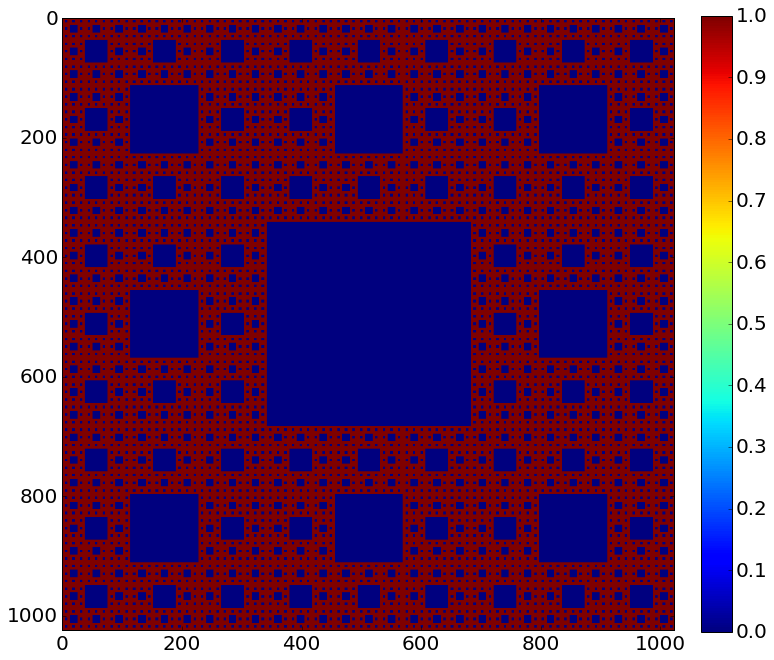

In [15]:
fig = plt.figure(figsize=(12,12))
cax = plt.imshow(chi[0,:,:])
cbar = fig.colorbar(cax,fraction=0.046, pad=0.04)

In [13]:
tchi = np.zeros((N,N,N))
tchi[:,:,:] = chi[:,:,:]

In [14]:
start = time.time()

chi = ft.zeros_aligned((N,N,N), dtype='float32')
cchi = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
corr = ft.zeros_aligned((N,N,N),dtype='float32')

end = time.time()
print(end-start)

139.815392971


In [15]:
chi[:,:,:] = tchi[:,:,:]

In [16]:
start = time.time()

fo[:,:,:] = chi[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cchi[:,:,:] = bo[:,:,:]

tmp = cchi*(cchi.conj())

bo[:,:,:] = tmp[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
corr[:,:,:] = fo[:,:,:]/(N**3)

end = time.time()
print(end-start)

357.252918959


In [17]:
dx = 1/N
ner = int(512*np.sqrt(3))

r2 = np.zeros((N//2,N//2,N//2), dtype='float32')
iCorr = np.zeros((N//2,N//2,N//2), dtype='float32')

In [18]:
r2[:,:,:] = X[0:N//2,0:N//2,0:N//2]**2+Y[0:N//2,0:N//2,0:N//2]**2+Z[0:N//2,0:N//2,0:N//2]**2
r2rt = np.sqrt(r2)

In [19]:
minrt = np.min(r2rt)
maxrt = np.max(r2rt)
rbins = np.linspace(minrt,maxrt,1+ner)

In [20]:
iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 

In [21]:
start = time.time()

corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt)
                              ,bins = rbins,weights=iCorr)
    
r2Loc,r2edges = np.histogram(r2rt,range=(minrt,maxrt)
                            ,bins = rbins)

end = time.time()
print(end-start)

34.3547990322


In [22]:
cbins = (rbins[0:ner]+rbins[1:ner+1])/2

[  1.71130309  12.37998811]


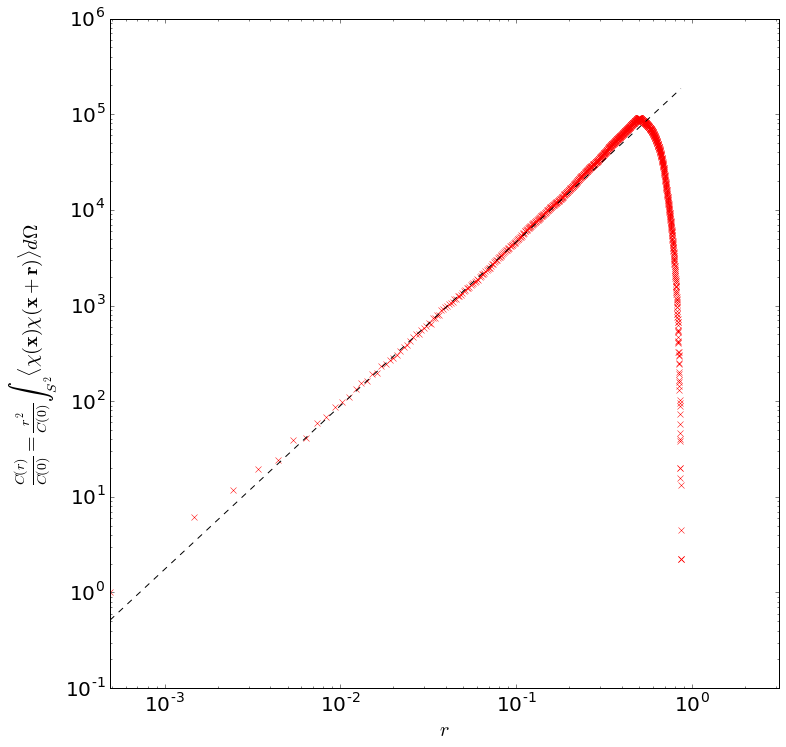

In [26]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.figure(figsize=(12,12))
plt.xlabel(r'$r$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{r^2}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)

plt.loglog(cbins,(corrLoc)/(corrLoc[0]),'rx')
plt.xlim(minrt+dx/4,np.pi)

tempRp = cbins[(cbins>0.01)&(cbins<0.1)]
tempCorr = corrLoc[(cbins>0.01)&(cbins<0.1)]/corrLoc[0]
fit = np.polyfit(np.log(tempRp),np.log(tempCorr),1)
print(fit)
plt.loglog(cbins,np.exp(fit[1])*(cbins**(fit[0])),'k--')

#plt.savefig("menger-sponge-correlation.pdf")

D=2.75325231766


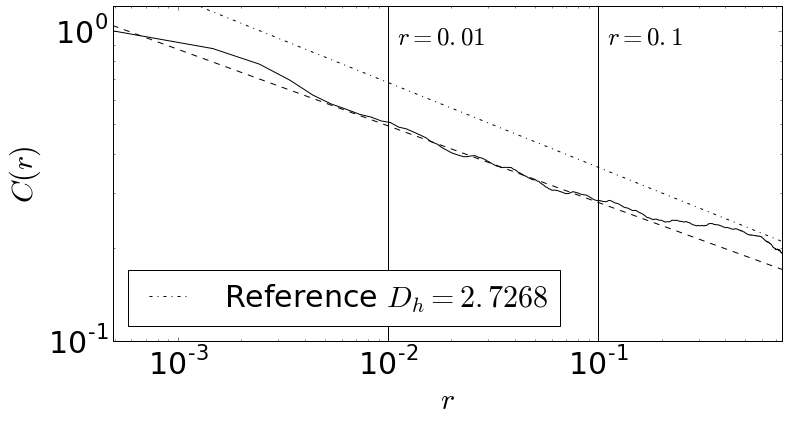

In [23]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
plt.figure(figsize=(12,6))
plt.xlabel(r'$r$', fontsize=30)
plt.ylabel(r'$C(r)$', fontsize=30)

plt.loglog(cbins,(corrLoc/r2Loc)/(corrLoc[0]/r2Loc[0]),'k-')
plt.xlim(minrt+dx/4,0.75)
plt.ylim(10**(-1),1.2)

tempRp = cbins[(cbins>0.01)&(cbins<0.1)]
tempCorr = (corrLoc[(cbins>0.01)&(cbins<0.1)]/r2Loc[(cbins>0.01)&(cbins<0.1)])/(corrLoc[0]/r2Loc[0])
fit = np.polyfit(np.log(tempRp),np.log(tempCorr),1)
print("D="+str(fit[0]+3))

plt.loglog(cbins,np.exp(fit[1]+0.2)*(cbins**(-(3-2.72683302786))),'k-.',label=r'Reference $D_h = 2.7268$')

plt.loglog(cbins,np.exp(fit[1])*(cbins**(fit[0])),'k--')

plt.axvline(x=0.01, color='k', linestyle='-')
plt.axvline(x=0.1, color='k', linestyle='-')
plt.text(0.011, 0.913, r'$r = 0.01$', fontsize=25)
plt.text(0.11, 0.913, r'$r = 0.1$', fontsize=25)

plt.legend(loc='lower left',prop={'size':30},ncol=1)

plt.savefig("menger-sponge-correlation-1.pdf")

In [57]:
scales = []
BoxL = 1
x0 = y0 = z0 = 0.

L = BoxL/2.

x1 = x0+1
y1 = y0+1
z1 = z0+1

nx = int((x1-x0)/L)+1
ny = int((y1-y0)/L)+1
nz = int((z1-z0)/L)+1

x1 = x0 + nx*L
y1 = y0 + ny*L 
z1 = z0 + nz*L

In [58]:
Xs = X[chi>0]
Ys = Y[chi>0]
Zs = Z[chi>0]

In [70]:
eta = 0.00287
hist = np.zeros((Xs.shape[0],3))
scales = np.logspace(np.log(10**(0)),np.log(10**(-3)), num=250, endpoint=True, base=np.e)

In [ ]:
hist[:,0] = Xs[:]
hist[:,1] = Ys[:]
hist[:,2] = Zs[:]

start0 = time.time()

count = []
for L in scales:
    start = time.time()
    print("scale = "+str(L))
    
    x1 = x0+1
    y1 = y0+1
    z1 = z0+1
    
    nx = int((x1-x0)/L)+1
    ny = int((y1-y0)/L)+1
    nz = int((z1-z0)/L)+1
    
    x1 = x0 + nx*L
    y1 = y0 + ny*L 
    z1 = z0 + nz*L
    
    H, edges = np.histogramdd(hist, bins=(nx,ny,nz), range=((x0,x1),(y0,y1),(z0,z1)), normed=True)
    
    Hn = H[:]
    Hn[Hn>0] = 1
    numBox = np.sum(Hn)
    
    count.append(numBox)
    end = time.time()
    print("Time = "+str(end-start))
    
end0 = time.time()
print("Total = ",end0-start0)

scale = 1.0


In [ ]:
%matplotlib inline

scales = np.array(scales)
count = np.array(count)

fig = plt.figure(figsize=(12,6))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)      
plt.xlabel(r'$r/\eta$',size=40)
plt.ylabel(r'$N_r$',size=40)
plt.xlim([1,np.pi/eta])
plt.ylim([10**(0),10**6.1])

idx = scales<0.01
Idx = scales>0.1

fit = np.polyfit(np.log(scales[idx]),np.log(count[idx]),1)    
Fit = np.polyfit(np.log(scales[Idx]),np.log(count[Idx]),1)

print(fit[0],Fit[0])
    
plt.loglog(scales,count,'-',label=r'Menger Sponge')

plt.axvline(x=0.01,color='k', linestyle='-.')
plt.axvline(x=0.1,color='k', linestyle='-.')
plt.text(0.01, 10**5, r'$r = 42.5\eta$', fontsize=20)
plt.text(0.1, 10**5, r'$r = 425\eta$', fontsize=20)
plt.legend(loc='lower left',prop={'size':30},ncol=2)
plt.savefig('boxcount-menger-sponge.pdf', format='pdf', bbox_inches='tight', transparent=True)

In [ ]:
scales = []
BoxL = 1
x0 = y0 = z0 = 0.

L = BoxL/2.

x1 = x0+1
y1 = y0+1
z1 = z0+1

nx = int((x1-x0)/L)+1
ny = int((y1-y0)/L)+1
nz = int((z1-z0)/L)+1

x1 = x0 + nx*L
y1 = y0 + ny*L 
z1 = z0 + nz*L

In [ ]:
eta = 0.00287
hist = np.zeros((Xs.shape[0],3))
scales = np.logspace(np.log(10**(-3)),np.log(10**(-1)), num=250, endpoint=True, base=np.e)

In [ ]:
hist[:,0] = Xs[:]
hist[:,1] = Ys[:]
hist[:,2] = Zs[:]

start0 = time.time()

count = []
for L in scales:
    start = time.time()
    
    x1 = x0+1
    y1 = y0+1
    z1 = z0+1
    
    nx = int((x1-x0)/L)+1
    ny = int((y1-y0)/L)+1
    nz = int((z1-z0)/L)+1
    
    x1 = x0 + nx*L
    y1 = y0 + ny*L 
    z1 = z0 + nz*L
    
    H, edges = np.histogramdd(hist, bins=(nx,ny,nz), range=((x0,x1),(y0,y1),(z0,z1)), normed=True)
               
    Hn = H[:,:,:]
    Sn = H[:,:,:]
    Bn = H[:,:,:]
    ###############################################################
    # Here is where boxcouting and correlation dimension differs. #
    ###############################################################
    Bn[Bn>0] = 1
    numBox = np.sum(Bn)
    numPts = np.sum(Sn)
    print(numBox,numPts)
    Hn[:,:,:] = Hn[:,:,:]/(numPts)
    corrBox = np.sum(Hn**2)
    ###############################################################
    gbox = np.zeros(1,dtype='float32')
    gbox[0] = corrBox
    gbox = gbox[0]#/numBox
    ###############################################################
    count.append(gbox)
        
    end = time.time()
    
end0 = time.time()
print("Total = ",end0-start0)

In [ ]:
%matplotlib inline

scales = np.array(scales)
count = np.array(count)

fig = plt.figure(figsize=(12,6))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)      
plt.xlabel(r'$r/\eta$',size=40)
plt.ylabel(r'$\langle \mu^2_\chi\rangle_r$',size=40)
plt.xlim([1,np.pi/eta])
#plt.ylim([10**(-6),10**(-1)])

idx = scales<20.*eta
Idx = scales>450.*eta

fit = np.polyfit(np.log(scales[idx]),np.log(count[idx]),1)    
Fit = np.polyfit(np.log(scales[Idx]),np.log(count[Idx]),1)
    
print(fit[0],Fit[0])

plt.loglog(scales/eta,count,'-',label=r'$\omega^2/2 > {:6.0f}\langle S^2\rangle $'.format(t))

plt.plot(scales[idx],fit[0]*scales[idx],'k--')

plt.axvline(x=42.5,color='k', linestyle='-.')
plt.axvline(x=425.,color='k', linestyle='-.')
plt.text(44.5, 10**(-5), r'$r = 42.5\eta$', fontsize=20)
plt.text(435., 10**(-5), r'$r = 425\eta$', fontsize=20)
plt.legend(loc='upper left',prop={'size':30},ncol=2)
plt.savefig('boxcount-correlation-menger-sponge.pdf', format='pdf', bbox_inches='tight', transparent=True)